<a href="https://colab.research.google.com/github/Federico6419/MachineLearningProject/blob/main/MachineLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install libraries


In [1]:
!pip install gymnasium
!pip install swig     #This solves the errori in the installation of gymnasium[box2d]
!pip install gymnasium[box2d]
!pip install gym-notebook-wrapper   #This installs Gym-Notebook-Wrapper, that provides small wrappers for running and rendering OpenAI Gym

#To solve the xvfb missing file problem
!sudo apt-get install xvfb
!pip install xvfbwrapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2373078 sha256=a5f8dfc919149c9e5dbe8f337a951d748e47fc5a7296e9bd67fb647b66ea43fe
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfi

## Import libraries

In [2]:
import gymnasium as gym
import gnwrapper
import torch

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Get Car Racing

In [3]:
!git clone https://github.com/Federico6419/MachineLearningProject.git
%cd MachineLearningProject

from car_racing import CarRacing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cloning into 'MachineLearningProject'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
Receiving objects: 100% (6/6), 9.16 KiB | 9.16 MiB/s, done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
/content/MachineLearningProject


## Example

'\ndef state_image_preprocess(state_image):\n    state_image = state_image.transpose((2,0,1))\n    state_image = np.ascontiguousarray(state_image, dtype=np.float32) / 255\n    state_image = torch.from_numpy(state_image)\n    return state_image.unsqueeze(0).to(device)\n\nstate_image_preprocess(im).shape\nplt.imshow(state_image_preprocess(im).cpu().squeeze(0).permute(1, 2, 0).numpy())\n'

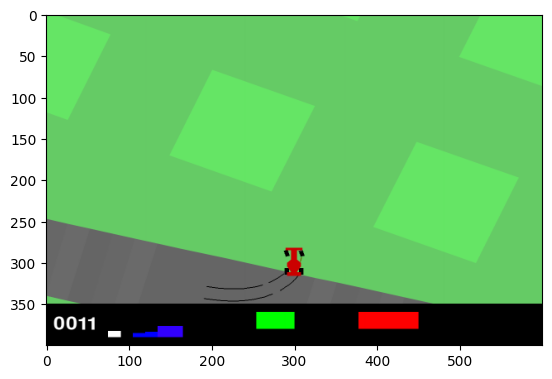

In [18]:
env = gnwrapper.Animation(CarRacing())
env = CarRacing(render_mode="rgb_array")
#env = CarRacing(render_mode="state_pixels")
#env = gym.make("CarRacing-v2", domain_randomize=True, render_mode="state_pixels")

env.reset()
#env.render()
#im = env.render()
#im = env.render("state_pixels")

#plt.imshow(im)

for i in range(40):
  env.step(action=[-0.3,1,0])
  im = env.render()
  plt.imshow(im)

"""
def state_image_preprocess(state_image):
    state_image = state_image.transpose((2,0,1))
    state_image = np.ascontiguousarray(state_image, dtype=np.float32) / 255
    state_image = torch.from_numpy(state_image)
    return state_image.unsqueeze(0).to(device)

state_image_preprocess(im).shape
plt.imshow(state_image_preprocess(im).cpu().squeeze(0).permute(1, 2, 0).numpy())
"""